In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [2]:
# Now load the processed file into Pandas
df = pd.read_csv("data/bac_2016_processed.csv", sep=',')
df['NOTA_EA'] = pd.to_numeric(df['NOTA_EA'], errors='coerce')
df['NOTA_EB'] = pd.to_numeric(df['NOTA_EB'], errors='coerce')
df['NOTA_EC'] = pd.to_numeric(df['NOTA_EC'], errors='coerce')
df['NOTA_ED'] = pd.to_numeric(df['NOTA_ED'], errors='coerce')
df

C:\Users\gabip\AppData\Local\Temp\ipykernel_25156\2321375922.py:2: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/bac_2016_processed.csv", sep=',')


,Cod unic candidat,Sex,Specializare,Profil,Fileira,Forma de învățământ,Mediu candidat,Unitate (SIIIR),Unitate (SIRUES),Clasa,...,NOTA_CONTESTATIE_EA,CONTESTATIE_EB,NOTA_CONTESTATIE_EB,CONTESTATIE_EC,NOTA_CONTESTATIE_EC,CONTESTATIE_ED,NOTA_CONTESTATIE_ED,PUNCTAJ DIGITALE,STATUS,Medie
0,433009,F,Științe Sociale,Uman,Teoretica,Zi,RURAL,1561101281,1181435.0,a XII-a D,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,32,Promovat,6.31
1,433016,F,Științe ale Naturii,Real,Teoretica,Zi,RURAL,361104127,30336095.0,a XII-a D,...,NaN,Nu,NaN,Da,4.35,Nu,NaN,83,Nepromovat,NaN
2,433034,F,Matematica-informatica,Militar,Vocationala,Zi,URBAN,3361108096,332000004.0,a XII-a C,...,NaN,Nu,NaN,Nu,NaN,Da,8.55,58,Promovat,9.06
3,433040,M,Matematica-Informatica,Real,Teoretica,Zi,RURAL,3461100833,1182623.0,a XII-a A,...,8.1,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.03
4,203413,M,Tehnician operator tehnică de calcul,Tehnic,Tehnologica,Zi,RURAL,1561100018,1181409.0,a XII-a B,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,35,Promovat,7.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137333,456334,M,Tehnician în instalații electrice,Tehnic,Tehnologica,Zi,RURAL,661103809,1180675.0,a XII-a G,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,51,Nepromovat,NaN
137334,495591,F,Științe ale Naturii,Real,Teoretica,Zi,RURAL,861100726,397623.0,a XII-a D,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,66,Promovat,8.95
137335,417014,M,Matematica-Informatica,Real,Teoretica,Zi,RURAL,561100242,1161980.0,a XII-a A,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,37,Nepromovat,NaN
137336,424374,F,Științe ale Naturii,Real,Teoretica,Zi,URBAN,561100961,364602.0,a XII-a D,...,8.2,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.00


In [3]:
df.describe()

,Cod unic candidat,Unitate (SIIIR),Unitate (SIRUES),NOTA_EA,NOTA_EB,NOTA_EC,NOTA_ED,Medie
count,137338.000000,1.373380e+05,1.373100e+05,137338.000000,7211.000000,137333.000000,133819.000000,93532.000000
mean,427687.424740,2.316165e+09,2.735162e+07,6.392315,8.882041,6.447258,8.927385,7.754030
std,96415.389747,1.294902e+09,7.878717e+07,2.428646,10.093929,4.574496,11.683737,1.204648
min,11.000000,1.611000e+08,1.010000e+02,-2.900000,-2.800000,-2.900000,-2.000000,5.000000
25%,415704.250000,1.261103e+09,5.810540e+05,5.150000,6.250000,5.150000,5.500000,6.760000
50%,451250.500000,2.261106e+09,8.320250e+05,6.600000,7.600000,6.600000,7.800000,7.830000
75%,486423.750000,3.361108e+09,1.182702e+06,8.200000,8.800000,8.500000,9.100000,8.780000
max,521361.000000,5.261102e+09,1.484546e+09,10.900000,95.900000,95.900000,95.000000,10.000000


In [4]:
# my results
record = df[(df['NOTA_EA'] == 9.40) & (df['NOTA_EC'] == 9.5) & (df['NOTA_ED'] == 9.70)]
# My number is 429923

In [5]:
lmf = df[(df['Unitate (SIIIR)'] == 2161100876)]
lmf.to_csv('data/lmf.csv', index=False)  

In [6]:
unique_values = df['Subiect ed'].unique()
print(unique_values)

['Geografie' 'Anatomie și fiziologie umană, genetică și ecologie umană'
 'Biologie vegetală și animală' 'Fizică TEO'
 'Chimie organică TEO Nivel I/II' 'Sociologie' 'Informatică SN C/C++'
 'Psihologie' 'Logică, argumentare și comunicare' 'Informatică MI C/C++'
 'Economie' 'Chimie anorganică TEH Nivel I/II     ' 'Fizică TEH'
 'Chimie anorganică TEO Nivel I/II     ' 'Chimie organică TEH Nivel I/II'
 'Filosofie' 'Informatică SN Pascal' 'Informatică MI Pascal']


In [7]:
my_scores = {'NOTA_EA': 9.4, 'NOTA_EC': 9.5, 'NOTA_ED': 9.7, 'Medie': 9.53}

## Nation-wide results

In [8]:
df_cleaned = df[(df[['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']] <= 10.0).all(axis=1)]

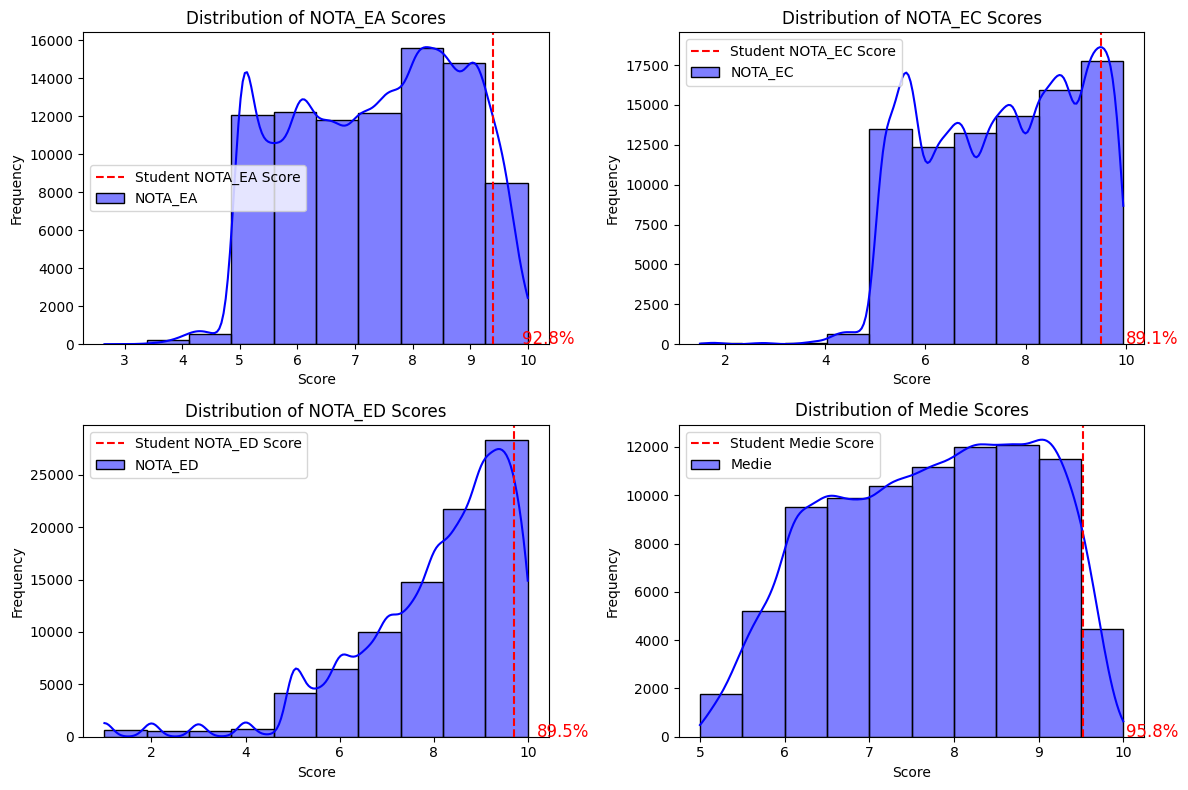

In [13]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot distributions and highlight the student's score
for i, subject in enumerate(['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1th subplot
    sns.histplot(df_cleaned[subject], kde=True, color='blue', bins=10, label=subject)
    
    # Calculate the percentile of the student's score
    percentile = percentileofscore(df_cleaned[subject], my_scores[subject])
    
    # Add a vertical line at the student's score
    plt.axvline(my_scores[subject], color='red', linestyle='--', label=f"Student {subject} Score")
    
    # Add text annotation with the percentile
    plt.text(my_scores[subject] + 0.5, 2, f"{percentile:.1f}%", color='red', fontsize=12)
    
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('results/nationwide.png')
plt.show()


## Nation-wide results (mathematics-informatics specialization)

In [10]:
df_cleaned_mateinfo = df_cleaned[(df_cleaned['Subiect ec'] == 'Matematică MATE-INFO')]
df_cleaned_mateinfo

,Cod unic candidat,Sex,Specializare,Profil,Fileira,Forma de învățământ,Mediu candidat,Unitate (SIIIR),Unitate (SIRUES),Clasa,...,NOTA_CONTESTATIE_EA,CONTESTATIE_EB,NOTA_CONTESTATIE_EB,CONTESTATIE_EC,NOTA_CONTESTATIE_EC,CONTESTATIE_ED,NOTA_CONTESTATIE_ED,PUNCTAJ DIGITALE,STATUS,Medie
2,433034,F,Matematica-informatica,Militar,Vocationala,Zi,URBAN,3361108096,332000004.0,a XII-a C,...,NaN,Nu,NaN,Nu,NaN,Da,8.55,58,Promovat,9.06
3,433040,M,Matematica-Informatica,Real,Teoretica,Zi,RURAL,3461100833,1182623.0,a XII-a A,...,8.1,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.03
7,433057,M,Matematica-informatica,Militar,Vocationala,Zi,URBAN,2961101743,2000004.0,a XII-a B,...,6.9,Nu,NaN,Nu,NaN,Nu,NaN,73,Promovat,7.85
8,433065,M,Matematica-informatica,Militar,Vocationala,Zi,RURAL,3361108096,332000004.0,a XII-a C,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.55
11,433085,M,Matematica-informatica,Militar,Vocationala,Zi,RURAL,3361108096,332000004.0,a XII-a C,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137286,401586,M,Matematica-Informatica,Real,Teoretica,Zi,URBAN,1061104287,1180974.0,a XII-a B,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,40,Promovat,8.11
137289,469317,F,Matematica-Informatica,Real,Teoretica,Zi,RURAL,361104068,336025.0,a XII-a G,...,7.95,Nu,NaN,Nu,NaN,Nu,NaN,85,Promovat,8.80
137290,428115,F,Matematica-Informatica,Real,Teoretica,Zi,URBAN,1061104043,1213848.0,a XII-a B,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,65,Promovat,7.03
137305,480297,M,Matematica-Informatica,Real,Teoretica,Zi,URBAN,3361103593,691287.0,a XII-a Een,...,NaN,Nu,NaN,Nu,NaN,Nu,NaN,NaN,Promovat,9.65


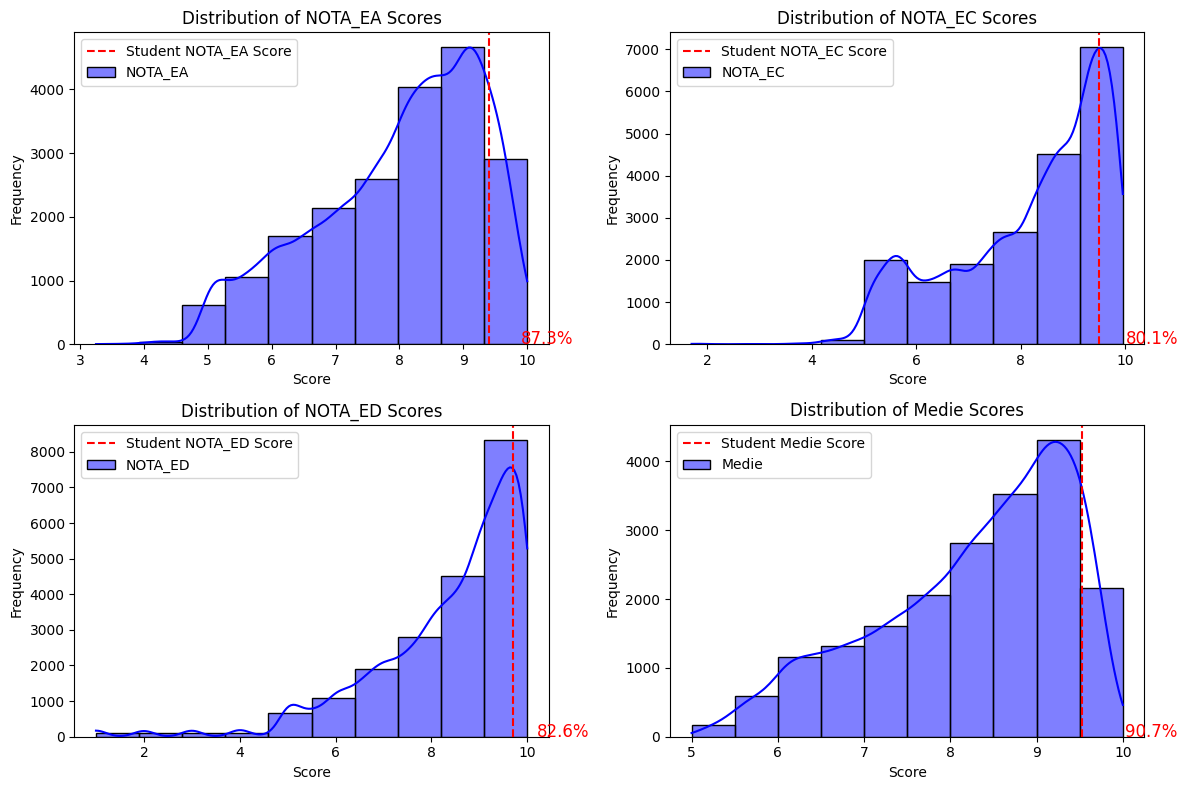

In [12]:
# Set the size of the plots
plt.figure(figsize=(12, 8))

# Plot distributions and highlight the student's score
for i, subject in enumerate(['NOTA_EA', 'NOTA_EC', 'NOTA_ED', 'Medie']):
    plt.subplot(2, 2, i+1)  # 2 rows, 2 columns, i+1th subplot
    sns.histplot(df_cleaned_mateinfo[subject], kde=True, color='blue', bins=10, label=subject)
    
    # Calculate the percentile of the student's score
    percentile = percentileofscore(df_cleaned_mateinfo[subject], my_scores[subject])
    
    # Add a vertical line at the student's score
    plt.axvline(my_scores[subject], color='red', linestyle='--', label=f"Student {subject} Score")
    
    # Add text annotation with the percentile
    plt.text(my_scores[subject] + 0.5, 2, f"{percentile:.1f}%", color='red', fontsize=12)
    
    plt.title(f'Distribution of {subject} Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('results/nationwide_mathinfo.png')
plt.show()
